<a href="https://colab.research.google.com/github/rks16/My_project/blob/main/Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering of FIFA Players based on their skill set

In [2]:
# importing dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Data Collection and Processing




In [3]:
df = pd.read_csv("/content/players_20.csv")

In [4]:
# preview
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,...,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,...,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,...,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,...,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


In [5]:
# Total number of data in the new dataset
df.shape

(18278, 104)

In [6]:
# Getting information about the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


In [7]:
# Analyzing different statistical parameters in the dataset

df.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,...,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,...,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,...,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125
min,768.000000,16.000000,156.000000,50.000000,48.000000,49.000000,0.000000e+00,0.000000,1.000000,1.000000,...,7.000000,12.000000,1.000000,5.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,204445.500000,22.000000,177.000000,70.000000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,39.000000,51.000000,29.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,226165.000000,25.000000,181.000000,75.000000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,240795.750000,29.000000,186.000000,80.000000,71.000000,75.000000,2.100000e+06,8000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,252905.000000,42.000000,205.000000,110.000000,94.000000,95.000000,1.055000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,92.000000,90.000000,90.000000,92.000000,93.000000,91.000000,92.000000


In [8]:
# Extracting essential datas from the dataset

df = df[['short_name','age', 'height_cm', 'weight_kg', 'overall', 'potential',
       'value_eur', 'wage_eur', 'international_reputation', 'weak_foot',
       'skill_moves', 'release_clause_eur', 'team_jersey_number',
       'contract_valid_until', 'nation_jersey_number', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'gk_diving',
       'gk_handling', 'gk_kicking', 'gk_reflexes', 'gk_speed',
       'gk_positioning', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'mentality_composure', 'defending_marking', 'defending_standing_tackle',
       'defending_sliding_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes']]

In [9]:
#preview
df.head()

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8


In [10]:
df = df[df.overall > 86] # extracting players with overall above 86
df

,short_name,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,L. Messi,32,170,72,94,94,95500000,565000,5,4,...,75,96,33,37,26,6,11,15,14,8
1,Cristiano Ronaldo,34,187,83,93,93,58500000,405000,5,4,...,85,95,28,32,24,7,11,15,14,11
2,Neymar Jr,27,175,68,92,92,105500000,290000,5,5,...,90,94,27,26,29,9,9,15,15,11
3,J. Oblak,26,188,87,91,93,77500000,125000,3,3,...,11,68,27,12,18,87,92,78,90,89
4,E. Hazard,28,175,74,91,91,90000000,470000,4,4,...,88,91,34,27,22,11,12,6,8,8
5,K. De Bruyne,28,181,70,91,91,90000000,370000,4,5,...,79,91,68,58,51,15,13,5,10,13
6,M. ter Stegen,27,187,85,90,93,67500000,250000,3,4,...,25,70,25,13,10,88,85,88,88,90
7,V. van Dijk,27,193,92,90,91,78000000,200000,3,3,...,62,89,91,92,85,13,10,13,11,11
8,L. Modrić,33,172,66,90,90,45000000,340000,4,4,...,82,92,68,76,71,13,9,7,14,9
9,M. Salah,27,175,71,90,90,80500000,240000,3,3,...,77,91,38,43,41,14,14,9,11,14


In [12]:
pd.set_option('display.max_rows', 70)
df.isnull().sum()

short_name                     0
age                            0
height_cm                      0
weight_kg                      0
overall                        0
potential                      0
value_eur                      0
wage_eur                       0
international_reputation       0
weak_foot                      0
skill_moves                    0
release_clause_eur             0
team_jersey_number             0
contract_valid_until           0
nation_jersey_number          21
pace                          10
shooting                      10
passing                       10
dribbling                     10
defending                     10
physic                        10
gk_diving                     45
gk_handling                   45
gk_kicking                    45
gk_reflexes                   45
gk_speed                      45
gk_positioning                45
attacking_crossing             0
attacking_finishing            0
attacking_heading_accuracy     0
attacking_

Filling null values present in the dataset

In [13]:
df = df.fillna(df.mean())
df.isnull().sum()


<ipython-input-13-2e0af6df5038>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df = df.fillna(df.mean())


short_name                    0
age                           0
height_cm                     0
weight_kg                     0
overall                       0
potential                     0
value_eur                     0
wage_eur                      0
international_reputation      0
weak_foot                     0
skill_moves                   0
release_clause_eur            0
team_jersey_number            0
contract_valid_until          0
nation_jersey_number          0
pace                          0
shooting                      0
passing                       0
dribbling                     0
defending                     0
physic                        0
gk_diving                     0
gk_handling                   0
gk_kicking                    0
gk_reflexes                   0
gk_speed                      0
gk_positioning                0
attacking_crossing            0
attacking_finishing           0
attacking_heading_accuracy    0
attacking_short_passing       0
attackin

In [14]:
names = df.short_name.tolist() # saving names for later

df = df.drop(['short_name'], axis = 1) # drop the short_name column

df.head()

,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,32,170,72,94,94,95500000,565000,5,4,4,...,75,96,33,37,26,6,11,15,14,8
1,34,187,83,93,93,58500000,405000,5,4,5,...,85,95,28,32,24,7,11,15,14,11
2,27,175,68,92,92,105500000,290000,5,5,5,...,90,94,27,26,29,9,9,15,15,11
3,26,188,87,91,93,77500000,125000,3,3,1,...,11,68,27,12,18,87,92,78,90,89
4,28,175,74,91,91,90000000,470000,4,4,4,...,88,91,34,27,22,11,12,6,8,8


## Normalize (rescale) the data

In [15]:
x = df.values # numpy array
scaler = preprocessing.MinMaxScaler()
x_scaled = scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)


## Use PCA to reduce 60 columns into 2

In [16]:
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

# Performing K means clustering

In [17]:
# specify the number of clusters
kmeans = KMeans(n_clusters=5)

# fit the input data
kmeans = kmeans.fit(reduced)

# get the cluster labels
labels = kmeans.predict(reduced)

# centroid values
centroid = kmeans.cluster_centers_

# cluster values
clusters = kmeans.labels_.tolist()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Make a new data frame by adding players' names and their cluster

In [18]:
reduced['cluster'] = clusters
reduced['name'] = names
reduced.columns = ['x', 'y', 'cluster', 'name']
reduced.head()


,x,y,cluster,name
0,-1.482137,-1.287998,3,L. Messi
1,-1.180190,-0.894344,3,Cristiano Ronaldo
2,-1.335542,-1.460300,3,Neymar Jr
3,2.974839,-0.789651,2,J. Oblak
4,-1.207091,-1.249757,3,E. Hazard


Visualzing the clusters

<Figure size 6400x4800 with 0 Axes>

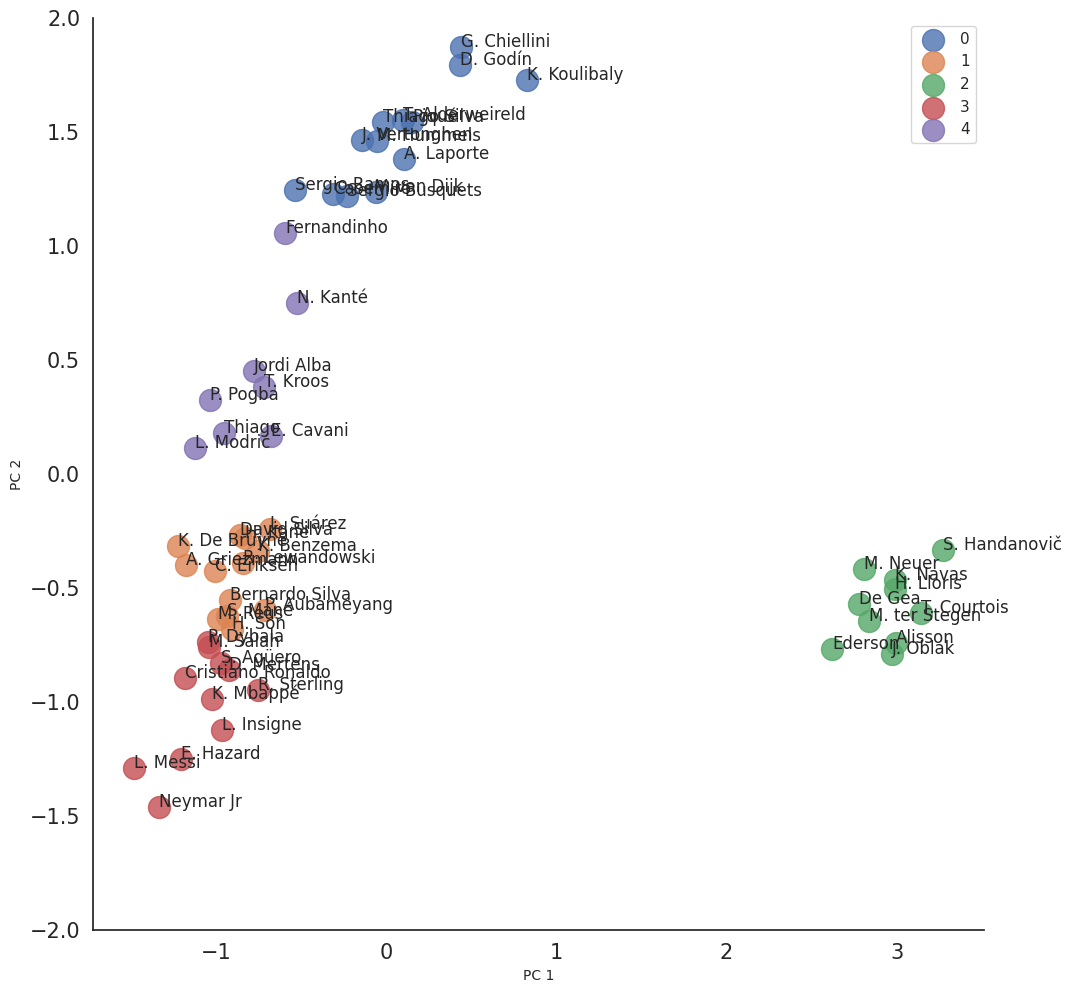

In [33]:
# sns.set(style="white")

%matplotlib inline

plt.figure(figsize=(80, 60), dpi=80)

ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend=False,
                   fit_reg=False, scatter_kws={"s": 250}, height=10)

texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.name):
    texts.append(plt.text(x, y, s))

ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("PC 1", fontsize = 10)
plt.ylabel("PC 2", fontsize = 10)
plt.legend()

plt.show()